<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio4_completo_em_squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I. Carregamento e Visualização Inicial dos Dados

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Suba o arquivo no Colab ou use o caminho correto
df = pd.read_csv("Desafio_04_suplementos.csv")

# Visualizar as primeiras linhas
df.head()

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
0,Fórmula 3,1,2.24,27,5
1,Fórmula 1,2,4.97,35,4
2,Fórmula 3,3,0.88,30,6
3,Fórmula 3,4,0.09,22,6
4,Fórmula 1,5,2.47,18,6


### II. Informações Gerais da Tabela

In [15]:
# Informações das colunas
df.info()

# Estatísticas descritivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         300 non-null    object 
 1   id_atleta          300 non-null    int64  
 2   ganho_massa        300 non-null    float64
 3   idade              300 non-null    int64  
 4   frequencia_treino  300 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


,id_atleta,ganho_massa,idade,frequencia_treino
count,300.000000,300.000000,300.000000,300.000000
mean,150.500000,2.466733,28.123333,3.993333
std,86.746758,1.436384,6.493742,1.430657
min,1.000000,0.030000,18.000000,2.000000
25%,75.750000,1.267500,22.000000,3.000000
50%,150.500000,2.400000,28.000000,4.000000
75%,225.250000,3.612500,34.000000,5.000000
max,300.000000,4.980000,39.000000,6.000000


### Análise Exploratória dos Dados

Questão 1. Faça uma análise exploratória dos dados:
* Qual é a média e a mediana do ganho de massa para cada
suplemento?
* Como os dados estão distribuídos? Utilize histogramas e
boxplots para visualizar as diferenças entre as fórmulas.
* Há outliers no ganho de massa muscular? O que isso pode
indicar?

In [25]:
# Média e Mediana
df.groupby("id_produto")["ganho_massa"].agg(["mean", "median"])

,mean,median
id_produto,,
Fórmula 1,2.656566,2.67
Fórmula 2,2.350106,2.15
Fórmula 3,2.393551,2.35


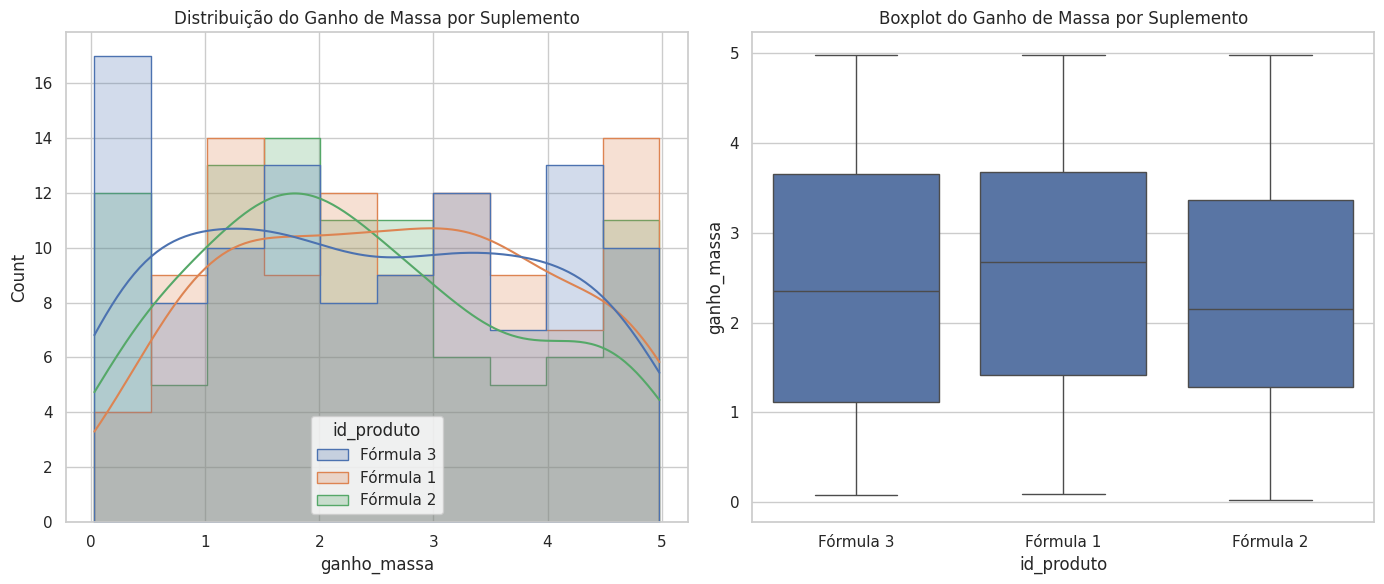

In [26]:
# Visualização com Histograma e Boxplot

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x="ganho_massa", hue="id_produto", kde=True, element="step", ax=axes[0])
axes[0].set_title("Distribuição do Ganho de Massa por Suplemento")

sns.boxplot(data=df, x="id_produto", y="ganho_massa", ax=axes[1])
axes[1].set_title("Boxplot do Ganho de Massa por Suplemento")

plt.tight_layout()
plt.show()

In [18]:
# Retirando outliers
def detectar_outliers(dados):
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return dados[(dados < limite_inferior) | (dados > limite_superior)]

df.groupby('id_produto')['ganho_massa'].apply(detectar_outliers).dropna()

,,ganho_massa
id_produto,,


Questão 2 - Há diferença estatisticamente significativa no ganho de massa
muscular entre as três fórmulas?

In [31]:
f1 = df[df["id_produto"] == "Fórmula 1"]["ganho_massa"]
f2 = df[df["id_produto"] == "Fórmula 2"]["ganho_massa"]
f3 = df[df["id_produto"] == "Fórmula 3"]["ganho_massa"]

anova = f_oneway(f1, f2, f3)
print("Estatística F:", anova.statistic)
print("Valor-p:", anova.pvalue)

# Se o valor-p (p-value) for menor que 0.05, há diferença estatisticamente significativa.
if anova.pvalue < 0.05:
    print("Há diferença estatisticamente significativa entre os ganhos de massa.")
else:
    print("Não há diferença estatisticamente significativa entre os ganhos de massa.")

Estatística F: 1.3160813512512974
Valor-p: 0.26974352074161734
Não há diferença estatisticamente significativa entre os ganhos de massa.


Questão 3)
* Existe correlação entre idade e ganho de massa muscular?
* Atletas mais jovens ou mais velhos têm resultados diferentes?

Correlação entre idade e ganho de massa: -0.07334337751402756


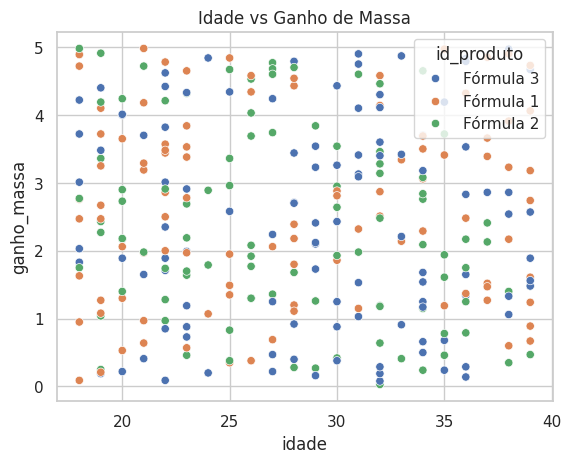

In [32]:
correlacao = df["ganho_massa"].corr(df["idade"])
print("Correlação entre idade e ganho de massa:", correlacao)

# Visualização
sns.scatterplot(data=df, x="idade", y="ganho_massa", hue="id_produto")
plt.title("Idade vs Ganho de Massa")
plt.show()

Questão 4)
Atletas que treinam mais frequentemente ganham mais massa
muscular independentemente do suplemento?


Correlação entre frequência de treino e ganho de massa: 0.07866306207730307


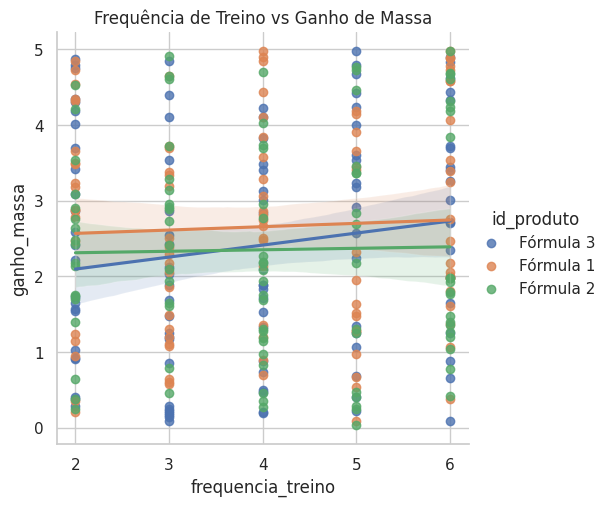

In [34]:
correlacao_freq = df["ganho_massa"].corr(df["frequencia_treino"])
print("Correlação entre frequência de treino e ganho de massa:", correlacao_freq)

# Visualização
sns.lmplot(data=df, x="frequencia_treino", y="ganho_massa", hue="id_produto")
plt.title("Frequência de Treino vs Ganho de Massa")
plt.show()

Questão 5)
Existe alguma correlação entre idade, frequência de treino e a
eficácia do suplemento?


Matriz de correlação:
                    ganho_massa     idade  frequencia_treino
ganho_massa           1.000000 -0.073343           0.078663
idade                -0.073343  1.000000          -0.081990
frequencia_treino     0.078663 -0.081990           1.000000


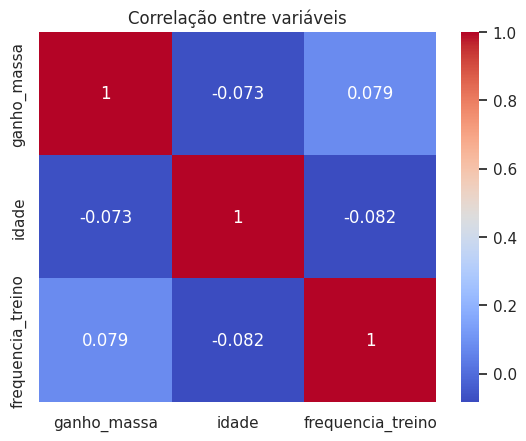

In [35]:
correlacoes = df[["ganho_massa", "idade", "frequencia_treino"]].corr()
print("Matriz de correlação:\n", correlacoes)

# Mapa de calor
sns.heatmap(correlacoes, annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()


Questão 6) Qual fórmula você recomendaria para atletas que treinam mais de 5 vezes por semana? Justifique sua escolha.

In [36]:
# Filtrar atletas com treino > 5 vezes/semana
frequentes = df[df["frequencia_treino"] > 5]
media_frequentes = frequentes.groupby("id_produto")["ganho_massa"].mean()
print("Média de ganho para atletas com treino > 5x/semana:\n", media_frequentes)


Média de ganho para atletas com treino > 5x/semana:
 id_produto
Fórmula 1    3.012609
Fórmula 2    2.566190
Fórmula 3    2.896000
Name: ganho_massa, dtype: float64
